In [166]:
import quandl, math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [167]:
interesting_columns = [
    'Name', 
    'Age',  
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club', 
    'Value', 
    'Wage', 
    'Position'
]

In [168]:
FF18 = pd.read_csv('data/CompleteDataset.csv')
FF18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 52 columns):
Unnamed: 0          17417 non-null int64
Unnamed: 0_x        17417 non-null int64
ID_x                17417 non-null int64
Name                17417 non-null object
Age                 17417 non-null int64
Photo               17417 non-null object
Nationality         17417 non-null object
Flag                17417 non-null object
Overall             17417 non-null int64
Potential           17417 non-null int64
Club                17173 non-null object
Club Logo           17417 non-null object
Value               17417 non-null object
Wage                17417 non-null object
Special             17417 non-null int64
Position            17417 non-null object
Unnamed: 0_y        17417 non-null int64
Acceleration        17255 non-null object
Aggression          17255 non-null object
Agility             17255 non-null object
Balance             17255 non-null object
Ball Control     

In [169]:
FF18.head(1).T

,0
Unnamed: 0,0
Unnamed: 0_x,0
ID_x,158023
Name,L. Messi
Age,30
Photo,https://cdn.sofifa.org/sm/18/players/158023.png
Nationality,Argentina
Flag,https://cdn.sofifa.org/flags/52.png
Overall,94
Potential,94


In [170]:
df = pd.DataFrame(FF18, columns=interesting_columns)
# df['Preferred Positions'] = df['Preferred Positions'].astype('str')
# df['Position'] = df['Preferred Positions'].str.split().str[0]
FF18 = df[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Position', 'Value', 'Wage']]
FF18.head(1).T

,0
Name,L. Messi
Age,30
Nationality,Argentina
Overall,94
Potential,94
Club,FC Barcelona
Position,CF|ST|RW
Value,€118.5M
Wage,€565K


In [171]:
FF18.fillna(value=0, inplace=True)
FF18.dropna(inplace=True)

In [172]:
FF18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17417 entries, 0 to 17416
Data columns (total 9 columns):
Name           17417 non-null object
Age            17417 non-null int64
Nationality    17417 non-null object
Overall        17417 non-null int64
Potential      17417 non-null int64
Club           17417 non-null object
Position       17417 non-null object
Value          17417 non-null object
Wage           17417 non-null object
dtypes: int64(3), object(6)
memory usage: 1.3+ MB


In [173]:
# Supporting function for converting string values into numbers
import re
def str2number(amount):
    if amount[-1] == 'M':
        amount = float(re.sub('[^\d\.]', '', amount))
        return float(amount)*1000000
    elif amount[-1] == 'K':
        amount = float(re.sub('[^\d\.]', '', amount))
        return float(amount)*1000
    else:
        amount = float(re.sub('[^\d\.]', '', amount))
        return float(amount)
    
FF18['ValueNum'] = FF18['Value'].apply(lambda x: str2number(x))
FF18['WageNum'] = FF18['Wage'].apply(lambda x: str2number(x))

In [174]:
FF18.head(1).T

,0
Name,L. Messi
Age,30
Nationality,Argentina
Overall,94
Potential,94
Club,FC Barcelona
Position,CF|ST|RW
Value,€118.5M
Wage,€565K
ValueNum,1.185e+08


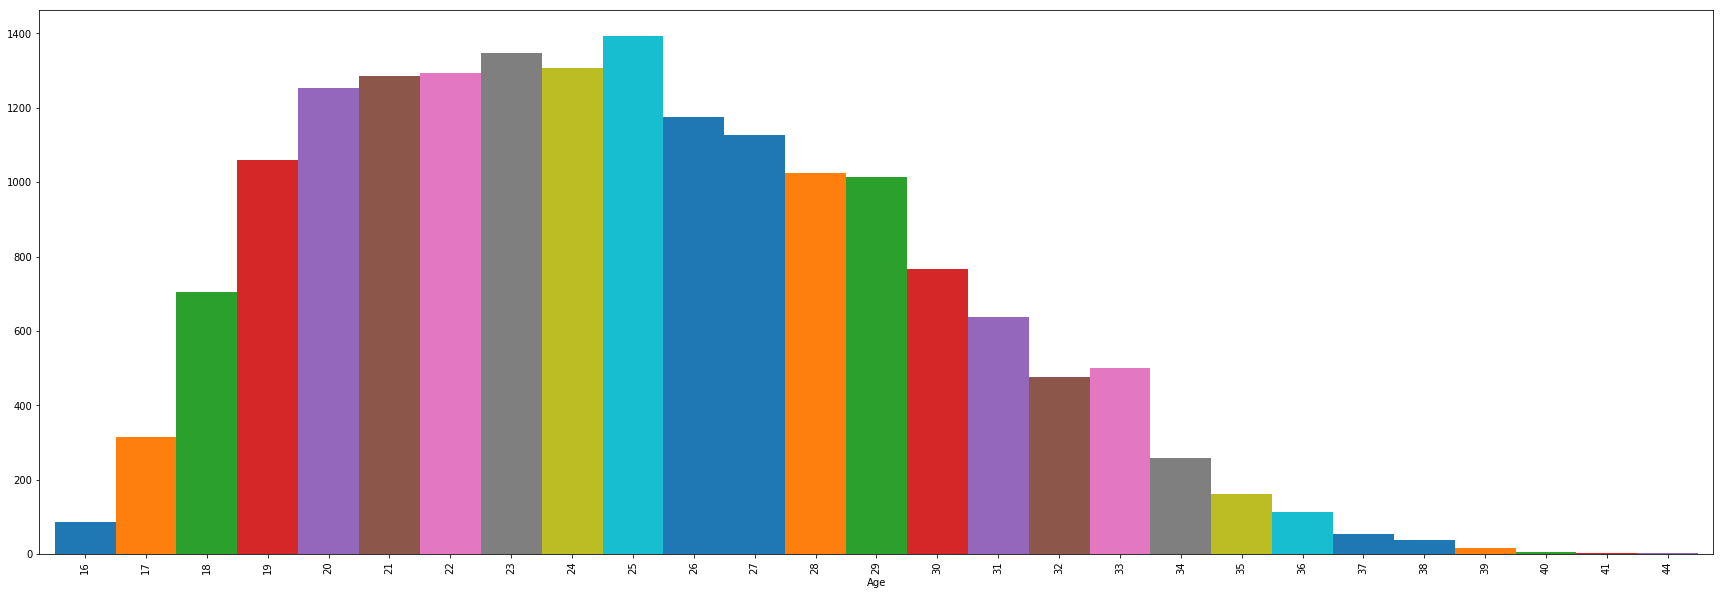

In [175]:
plt.figure(figsize=(30, 10))
df.groupby('Age')['Age'].count().plot(kind='bar', width=1)

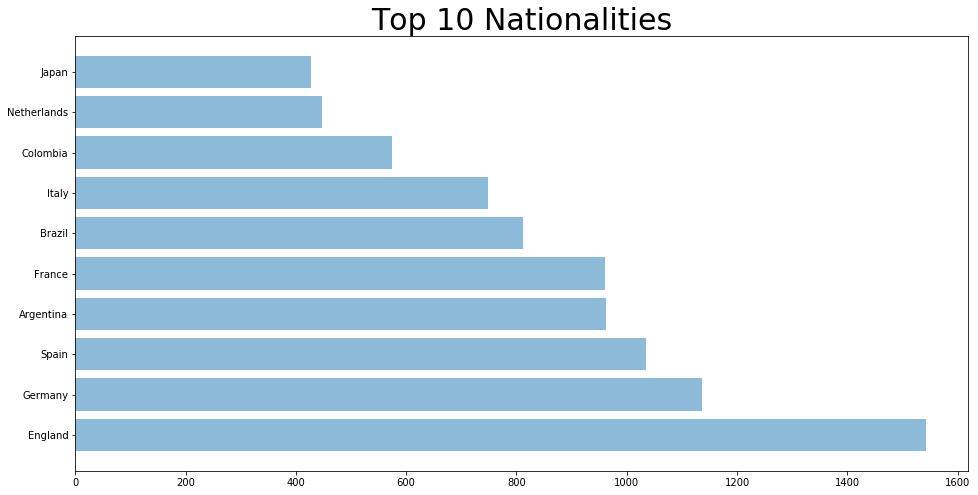

In [176]:
plt.figure(figsize=(16,8))
# func = lambda x : np.where(x < 0, x.mean(), x)
# def top_value_count(x, n=5):
#     return x.value_counts().head(n)
teams = df.groupby('Nationality')['Name'].count().reset_index()
teams = teams.sort_values('Name', ascending=False).head(10)
plt.barh(teams['Nationality'], teams['Name'], align='center', alpha=0.5)
plt.title('Top 10 Nationalities', fontsize=30)
plt.show()

In [177]:
def get_best_squad_n(formation, nationality, measurement = 'Overall'):
    FF18_copy = FF18.copy()
    FF18_copy = FF18_copy[FF18_copy['Nationality'] == nationality]
    store = []
    for i in formation:
        store.append([
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), 
            FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].max(),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Age'].to_string(index = False),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Club'].to_string(index = False),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Value'].to_string(index = False),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Wage'].to_string(index = False)
        ])
        FF18_copy.drop(FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax(), inplace = True)
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7), columns = ['Position', 'Player', measurement, 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [178]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []
    for i in nationality_list:
        count = 0
        for j in squad_list:
            # for overall rating
            O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'Overall') 
            summary.append([i, squad_name[count], O_temp_rating.round(2)])    
            count += 1
    return summary

In [179]:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

In [180]:
FF18[df['Position'].isnull()|df['Name'].isnull()|df['Age'].isnull()|df['Club'].isnull()|df['Value'].isnull()|df['Wage'].isnull()].head(3)

,Name,Age,Nationality,Overall,Potential,Club,Position,Value,Wage,ValueNum,WageNum
69,Y. Carrasco,23,Belgium,85,90,0,LM|RM,€0,€0,0.0,0.0
246,Oscar,25,Brazil,82,84,0,CAM|CM,€0,€0,0.0,0.0
262,A. Witsel,28,Belgium,82,82,0,CM|CDM|CAM,€0,€0,0.0,0.0


In [181]:
FF18.head(5)

,Name,Age,Nationality,Overall,Potential,Club,Position,Value,Wage,ValueNum,WageNum
0,L. Messi,30,Argentina,94,94,FC Barcelona,CF|ST|RW,€118.5M,€565K,118500000.0,565000.0
1,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,LW|ST,€95.5M,€565K,95500000.0,565000.0
2,Neymar,25,Brazil,92,93,Paris Saint-Germain,LW,€119.5M,€280K,119500000.0,280000.0
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,ST,€97M,€510K,97000000.0,510000.0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,GK,€61M,€230K,61000000.0,230000.0


In [183]:
for contry in teams['Nationality']:
    c = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, [contry])), columns = ['Nationality', 'Squad', 'Overall']) 
    print(c)
    rating_433_Overall, best_list_433_Overall = get_best_squad_n(squad_433_strict, contry, 'Overall')
    print('-Overall-')
    print('Average rating: {:.1f}'.format(rating_433_Overall))
    print(best_list_433_Overall)


  Nationality    Squad Overall
0     England    3-4-3   82.45
1     England    4-4-2   82.55
2     England  4-3-1-2   82.82
3     England    4-3-3   82.73
4     England  4-2-3-1   82.73
-Overall-
Average rating: 82.7
Position       Player Overall Age               Club   Value   Wage
       GK   J. Butland      81  24         Stoke City    €17M   €50K
   RB|RWB    K. Walker      84  27    Manchester City  €25.5M  €170K
       CB    G. Cahill      82  31            Chelsea    €15M  €125K
   CDM|CB      E. Dier      81  23  Tottenham Hotspur  €19.5M   €79K
   LB|LWB      D. Rose      81  26  Tottenham Hotspur    €15M   €92K
       CM   A. Lallana      82  29          Liverpool  €21.5M  €135K
   CAM|CF      D. Alli      84  21  Tottenham Hotspur    €43M  €115K
CAM|RW|RM   J. Lingard      81  24  Manchester United  €22.5M  €115K
 RW|LW|CF  R. Sterling      85  22    Manchester City    €49M  €180K
       ST      H. Kane      88  23  Tottenham Hotspur  €76.5M  €210K
 LM|ST|RM  M. Rashford   

   Nationality    Squad Overall
0  Netherlands    3-4-3   81.73
1  Netherlands    4-4-2   82.36
2  Netherlands  4-3-1-2   81.36
3  Netherlands    4-3-3   82.09
4  Netherlands  4-2-3-1   82.27
-Overall-
Average rating: 82.1
Position        Player Overall Age                Club   Value   Wage
      GK  J. Cillessen      81  28        FC Barcelona    €15M  €125K
      RB       K. Tete      78  21  Olympique Lyonnais  €11.5M   €43K
      CB   V. van Dijk      84  25           Liverpool  €31.5M  €145K
      CB    S. de Vrij      84  25               Lazio    €35M   €73K
   LB|CB      D. Blind      80  27   Manchester United    €12M  €120K
  CM|CDM  K. Strootman      83  27                Roma  €26.5M   €80K
      CM  G. Wijnaldum      82  26           Liverpool  €25.5M  €130K
  CM|CAM   D. Klaassen      80  24             Everton  €18.5M  €105K
   RM|RW     A. Robben      87  33    FC Bayern Munich  €30.5M  €175K
RM|ST|LM     Q. Promes      83  25      Spartak Moscow    €31M   €76K
   LW|S